In [99]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_excel('test.xlsx')

In [91]:
model = ols('value ~ C(Feed) + C(Depth) + C(Angle) + C(Feed):C(Depth) + C(Feed):C(Angle) + C(Depth):C(Angle)', data=df).fit()
anova_table = anova_lm(model, typ=2)

In [92]:
anova_table

,sum_sq,df,F,PR(>F)
C(Feed),45.5625,1.0,16.694656,0.002734
C(Depth),10.5625,1.0,3.870229,0.080693
C(Angle),3.0625,1.0,1.122137,0.317059
C(Feed):C(Depth),7.5625,1.0,2.770992,0.130343
C(Feed):C(Angle),0.0625,1.0,0.022901,0.883053
C(Depth):C(Angle),1.5625,1.0,0.572519,0.468603
Residual,24.5625,9.0,NaN,NaN


In [93]:
import pingouin as pg

In [94]:
anova2 = pg.anova(dv='value', between = ['Feed', 'Depth', 'Angle'], data=df)

In [95]:
anova2

,Source,SS,DF,MS,F,p-unc,np2
0,Feed,45.5625,1.0,45.5625,18.692308,0.002534,0.700288
1,Depth,10.5625,1.0,10.5625,4.333333,0.070931,0.351351
2,Angle,3.0625,1.0,3.0625,1.256410,0.294849,0.135734
3,Feed * Depth,7.5625,1.0,7.5625,3.102564,0.116197,0.279446
4,Feed * Angle,0.0625,1.0,0.0625,0.025641,0.876749,0.003195
5,Depth * Angle,1.5625,1.0,1.5625,0.641026,0.446463,0.074184
6,Feed * Depth * Angle,5.0625,1.0,5.0625,2.076923,0.187512,0.206107
7,Residual,19.5000,8.0,2.4375,NaN,NaN,NaN


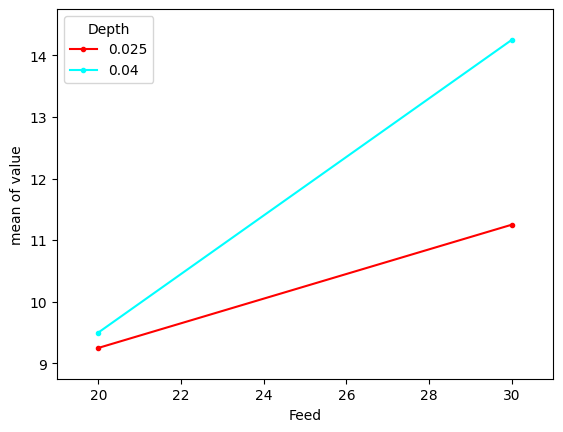

In [100]:
fig = interaction_plot(df.Feed, df.Depth, df.value)

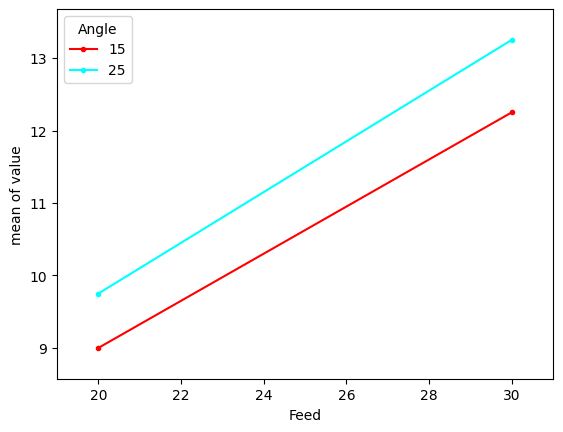

In [101]:
fig = interaction_plot(df.Feed, df.Angle, df.value)

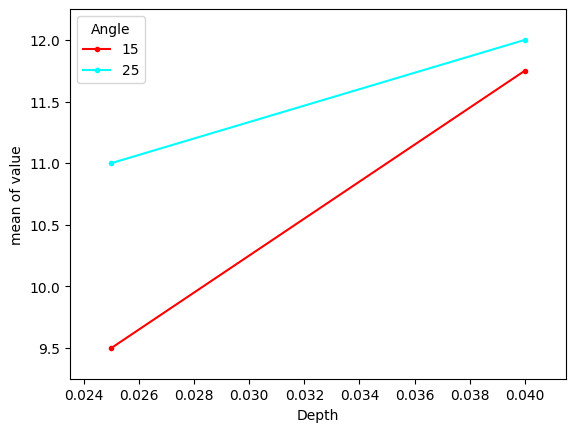

In [103]:
fig = interaction_plot(df.Depth, df.Angle, df.value)